In [37]:
import pandas as pd
import numpy as np

import acquire
import prepare
import preprocessing

#Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_dummies(df):
    '''
    This function will create dummy variables out of the original season column 
    and return a dataframe with all of the original columns except for 'season'. 
    New columns added will be 'Winter', 'Spring', 'Fall', and 'Summer' which are boolean. 
    '''
    # create dummy vars of season
    dummy_df = pd.get_dummies(df.season)
    # concatenate the dataframe with the 4 seasons columns to the original dataframe
    df_dummies = pd.concat([df, dummy_df], axis = 1)
    # drop season column
    df_dummies = df_dummies.drop(columns = ['season'])
    return df_dummies


In [4]:
hwy_df = acquire.get_hwyrail()
hwy_df

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,12/18/12 PER CONTRA COSTA COUNTY CORONERS REPO...,NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,NaN,20,2,SFRV,2132020,NaN,NaN,,,20.0,...,TRAIN P645 WAS TRAVELLING SOUTHBOUND AND STRUC...,ALLY INJURED; AGE IS CURRENTLY UNKNOWN.,NaN,NaN,NaN,SOUTHFLRAILCORRIDOR,A,2,2,NaN
1887,NaN,20,1,SFRV,1052020,NaN,NaN,,,20.0,...,TWO MALES ON A BICYCLE RAN UNDER CROSSING GATE...,HE BIKE WAS HIT AND KILLED WHILE THE OTHER ONE...,PORT IS PENDING SO AGE OF DECEASED IS STILL UN...,NaN,NaN,SOUTHFLRAILCORRIDOR,A,1,1,NaN
1888,NaN,20,1,SFRV,1092020,NaN,NaN,,,20.0,...,TRAIN P647 STRUCK A VEHICLE THAT STOPPED ON TH...,CT. HE WAS TRAVELING EAST IN THE WESTBOUND TRA...,NaN,NaN,NaN,SOUTHFLRAILCORRIDOR,A,1,1,NaN
1889,NaN,20,1,SFRV,1172020,NaN,NaN,,,20.0,...,TRAIN P628 STRUCK A VEHICLE THAT STOPPED ON TH...,UNINJURED.,NaN,NaN,NaN,SOUTHFLRAILCORRIDOR,A,2,2,NaN


In [5]:
hwy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
IYR,18995.0,15.995051,2.548730,12.0,14.0,16.0,18.0,20.0
IMO,18995.0,6.598052,3.531982,1.0,3.0,7.0,10.0,12.0
IYR2,19.0,17.947368,1.682382,14.0,17.0,18.0,19.5,20.0
IMO2,19.0,7.157895,4.003653,1.0,3.0,8.0,11.0,12.0
IYR3,18879.0,16.006038,2.550739,12.0,14.0,16.0,18.0,20.0
IMO3,18879.0,6.596801,3.531095,1.0,3.0,7.0,10.0,12.0
DUMMY1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASINJRR,18995.0,0.417531,1.278679,0.0,0.0,0.0,1.0,87.0
YEAR,18995.0,15.995051,2.548730,12.0,14.0,16.0,18.0,20.0
MONTH,18995.0,6.598052,3.531982,1.0,3.0,7.0,10.0,12.0


In [6]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df

,railroad_company,station,county,state,region,city,vehicle_speed,vehicle_type,vehicle_direction,position,...,train_occupants,user_killed,user_injured,rail_killed,rail_injured,train_pass_killed,train_pass_injured,road_condtions,date,season
incdtno,,,,,,,,,,,,,,,,,,,,,
0312RS009,UP,WOODBRIDGE,SAN JOAQUIN,6,7,LODI,0.0,A,4,2,...,3,0,0,0,0,0,0,B,2012-03-16 09:15:00,Spring
0312RS025,UP,ACAMPO,SAN JOAQUIN,6,7,,0.0,A,4,2,...,2,0,0,0,0,0,0,A,2012-03-30 21:35:00,Spring
CA1012201,BNSF,LOS NIETOS,LOS ANGELES,6,7,SANTA FE SPRINGS,0.0,A,1,2,...,3,0,0,0,0,0,0,A,2012-10-07 20:25:00,Fall
CA0712201,BNSF,FRESNO,FRESNO,6,7,FRESNO,0.0,A,1,2,...,2,0,1,0,0,0,0,A,2012-07-28 20:55:00,Summer
0612RS011,UP,BAKERSFIELD,KERN,6,7,,50.0,C,4,3,...,3,0,0,0,0,0,0,A,2012-06-18 15:58:00,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137378,NS,BALTIMORE,BALTIMORE,24,2,BALTIMORE,2.0,A,1,3,...,2,0,0,0,0,0,0,A,2020-03-04 06:32:00,Spring
189236,CSX,INWOOD ST,PRINCE GEORGE'S,24,2,HYATTSVILLE,10.0,C,4,3,...,2,0,0,0,0,0,0,A,2020-03-21 10:15:00,Spring
188716,CSX,MONTEVIDEO ROAD,HOWARD,24,2,ELKRIDGE,15.0,J,4,3,...,3,0,0,0,0,0,0,A,2020-02-27 09:30:00,Winter


In [7]:
hwy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 0312RS009 to 193825
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state               12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64 

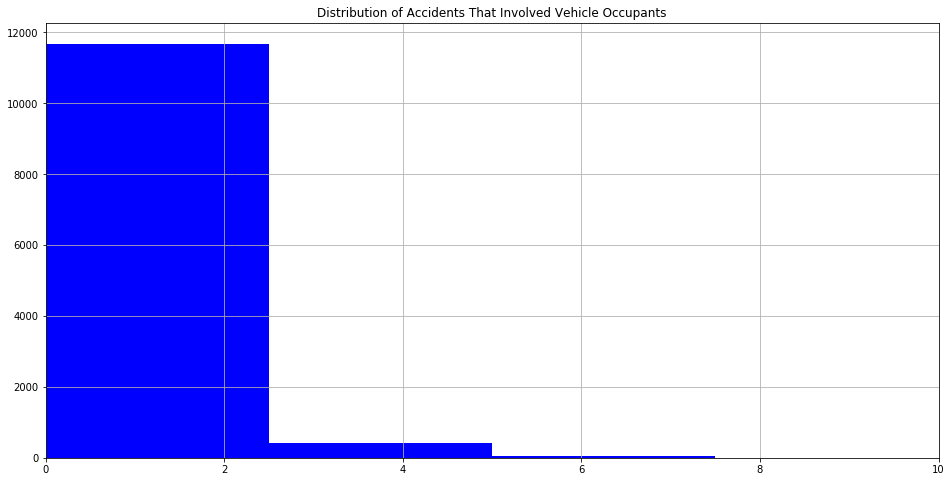

In [8]:
hwy_df['vehicle_occupants'].hist(color='blue', bins=20, figsize=(16,8))

plt.xlim([0, 10])
plt.title('Distribution of Accidents That Involved Vehicle Occupants')
plt.show()

In [9]:
hwy_df.vehicle_occupants.value_counts()

1     7929
0     2609
2     1147
3      318
4      106
5       46
6       10
7        4
13       3
18       1
50       1
9        1
11       1
8        1
12       1
28       1
14       1
15       1
Name: vehicle_occupants, dtype: int64

### Takeway
- An overwhelming majority of accidents that involved occupied vehicles had 2 or fewer occupants

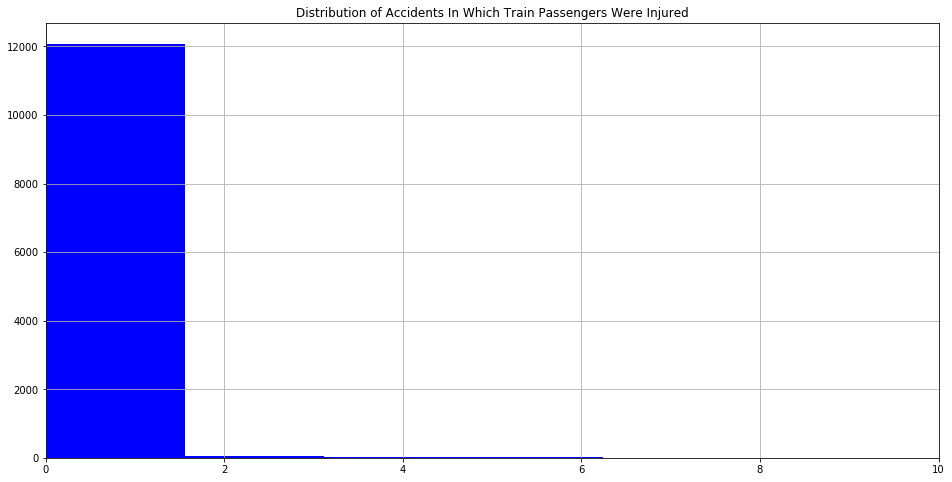

In [10]:
hwy_df['train_pass_injured'].hist(color='blue', bins=50, figsize=(16, 8))

plt.xlim([0, 10])
plt.title('Distribution of Accidents In Which Train Passengers Were Injured')
plt.show()

In [11]:
hwy_df['train_pass_injured'].value_counts()

0     11990
1        92
2        35
3        23
4         9
6         6
5         6
7         4
12        3
9         3
8         2
10        1
13        1
21        1
45        1
30        1
78        1
15        1
23        1
Name: train_pass_injured, dtype: int64

### Takeaway
- In the overwhelming majority of accidents, no passenger was injured
- In cases involving a number of injured passengers, the majority was three or fewer

In [12]:
drv_age_asc = hwy_df.driver_age.value_counts()
drv_age_asc 

      2173
40     456
30     266
21     238
35     220
      ... 
99       1
97       1
8        1
10       1
9        1
Name: driver_age, Length: 91, dtype: int64

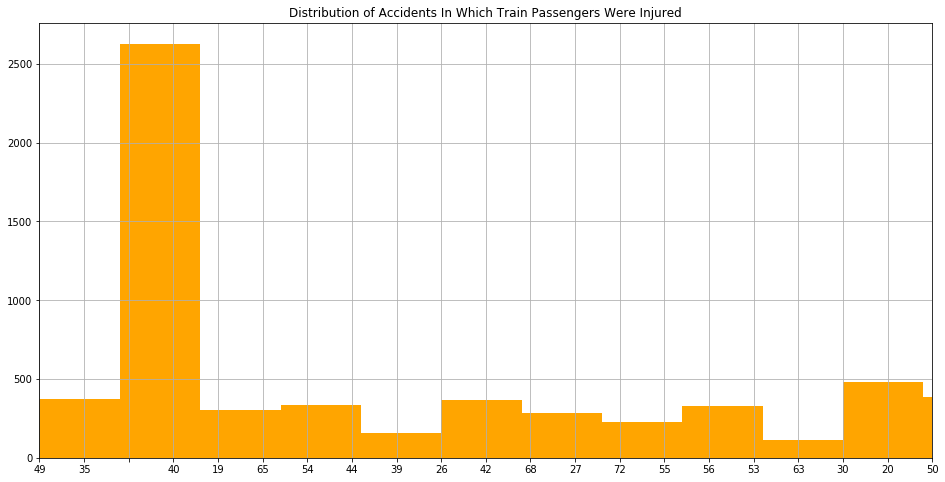

In [13]:
hwy_df['driver_age'].hist(color='orange', bins=50, figsize=(16, 8))

plt.xlim([0, 20])
plt.title('Distribution of Accidents In Which Train Passengers Were Injured')
plt.show()

### Takeaway
- The driver was 40 yrs old in most of the rr accidents

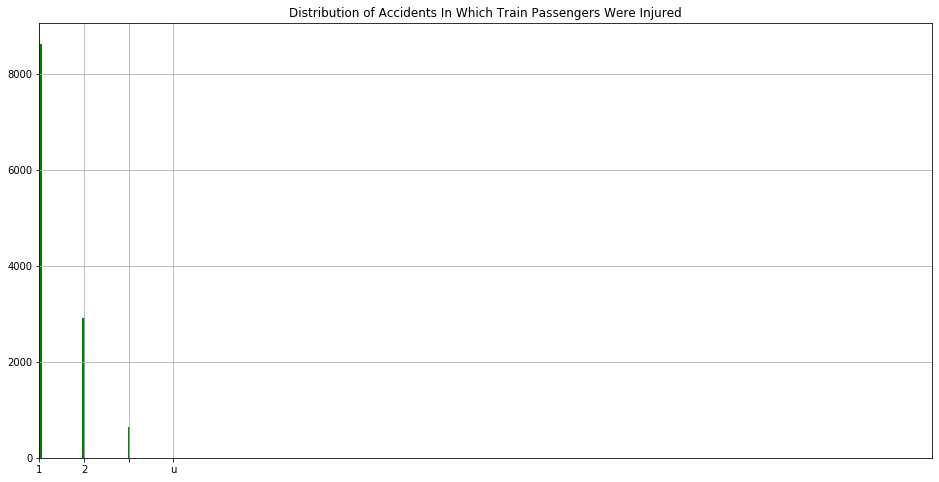

In [14]:
hwy_df['driver_gender'].hist(color='green', bins=50, figsize=(16, 8))

plt.xlim([0, 20])
plt.title('Distribution of Accidents In Which Train Passengers Were Injured')
plt.show()

### Takeaway 
- The drivers involved in rr accidents were overwhelmingly male

In [15]:
tx_pop = 29087070
tx_acdnt = 1631 / tx_pop

In [16]:
tx_acdnt = round(tx_acdnt, 4)
tx_acdnt

0.0001

In [17]:
ga_pop = 10617423
ga_acdnt = round(751 / ga_pop, 4)
ga_acdnt

0.0001

In [18]:
wy_pop = 572381
wy_acdnt = round(37 / wy_pop, 4)
wy_acdnt

0.0001

In [19]:
in_pop = 6805660
in_acdnt = round(727 / in_pop, 4)
in_acdnt

0.0001

In [20]:
la_pop = 4657767
la_acdnt = round(492 / la_pop, 4)
la_acdnt 

0.0001

In [21]:
get_dummies(hwy_df)

,railroad_company,station,county,state,region,city,vehicle_speed,vehicle_type,vehicle_direction,position,...,rail_killed,rail_injured,train_pass_killed,train_pass_injured,road_condtions,date,Fall,Spring,Summer,Winter
incdtno,,,,,,,,,,,,,,,,,,,,,
0312RS009,UP,WOODBRIDGE,SAN JOAQUIN,6,7,LODI,0.0,A,4,2,...,0,0,0,0,B,2012-03-16 09:15:00,0,1,0,0
0312RS025,UP,ACAMPO,SAN JOAQUIN,6,7,,0.0,A,4,2,...,0,0,0,0,A,2012-03-30 21:35:00,0,1,0,0
CA1012201,BNSF,LOS NIETOS,LOS ANGELES,6,7,SANTA FE SPRINGS,0.0,A,1,2,...,0,0,0,0,A,2012-10-07 20:25:00,1,0,0,0
CA0712201,BNSF,FRESNO,FRESNO,6,7,FRESNO,0.0,A,1,2,...,0,0,0,0,A,2012-07-28 20:55:00,0,0,1,0
0612RS011,UP,BAKERSFIELD,KERN,6,7,,50.0,C,4,3,...,0,0,0,0,A,2012-06-18 15:58:00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137378,NS,BALTIMORE,BALTIMORE,24,2,BALTIMORE,2.0,A,1,3,...,0,0,0,0,A,2020-03-04 06:32:00,0,1,0,0
189236,CSX,INWOOD ST,PRINCE GEORGE'S,24,2,HYATTSVILLE,10.0,C,4,3,...,0,0,0,0,A,2020-03-21 10:15:00,0,1,0,0
188716,CSX,MONTEVIDEO ROAD,HOWARD,24,2,ELKRIDGE,15.0,J,4,3,...,0,0,0,0,A,2020-02-27 09:30:00,0,0,0,1


In [24]:
hwy_df.info

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 0312RS009 to 193825
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state               12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64 

In [22]:
hwy_df.head(2)

,railroad_company,station,county,state,region,city,vehicle_speed,vehicle_type,vehicle_direction,position,...,train_occupants,user_killed,user_injured,rail_killed,rail_injured,train_pass_killed,train_pass_injured,road_condtions,date,season
incdtno,,,,,,,,,,,,,,,,,,,,,
0312RS009,UP,WOODBRIDGE,SAN JOAQUIN,6,7,LODI,0.0,A,4,2,...,3,0,0,0,0,0,0,B,2012-03-16 09:15:00,Spring
0312RS025,UP,ACAMPO,SAN JOAQUIN,6,7,,0.0,A,4,2,...,2,0,0,0,0,0,0,A,2012-03-30 21:35:00,Spring


In [32]:
#Split the Data
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = preprocessing.train_validate_test(hwy_df, 'railroad_company')

In [33]:
train.shape

(6820, 49)

## Stats testing

### Is there a relationship between user_killed and railcar_length?

In [34]:
# Set our alpha
alpha = .05

In [35]:
# cross rail company vs driver fate
observed = pd.crosstab(train.railcar_quantity, train.user_killed)
observed

user_killed,0,1,2,3,4,5
railcar_quantity,,,,,,
0,319,8,1,0,0,0
1,286,7,1,0,0,0
2,73,5,0,0,0,0
3,73,3,0,0,0,0
4,95,9,1,0,0,0
...,...,...,...,...,...,...
236,1,0,0,0,0,0
262,1,0,0,0,0,0
279,1,0,0,0,0,0


In [38]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [41]:
null_hypothesis = "rail accidents involving a car resulting in driver death is independent of railcar quantity"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We fail to reject the null hypothesis that highway accidents in which the driver of the car died is independent of railcar quantity
chi^2 = 1070.9900
p     = 0.1549


### Is there a relationship between railcar length and vehicle damage?

In [43]:
# Set our alpha
alpha = .05

In [42]:
# cross rail company vs driver fate
observed = pd.crosstab(train.railcar_quantity, train.vehicle_damage)
observed

vehicle_damage,0.0,1.0,5.0,10.0,20.0,25.0,40.0,50.0,65.0,75.0,...,200000.0,250000.0,300000.0,312000.0,360000.0,400000.0,500000.0,600000.0,750000.0,1000000.0
railcar_quantity,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [45]:
null_hypothesis = "rail accidents involving a car resulting in vehicle damage is independent of railcar quantity"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

We fail to reject the null hypothesis that rail accidents involving a car resulting in vehicle damage is independent of railcar quantity
chi^2 = 50967.4314
p     = 1.0000


In [47]:
# A quick t-test

less_than_150 = train[train.railcar_quantity <= 150]
greater_than_150 = train[train.railcar_quantity > 150]

t, p = stats.ttest_ind(less_than_150.vehicle_damage, greater_than_150.vehicle_damage)
print(f't = {t}, p = {p}')
print(f'The p-value is less than the alpha: {p < alpha}')

t = 0.09794748107374042, p = 0.9219768759748618
The p-value is less than the alpha: False


In [ ]:
equip_df = acquire.get_equiprail()

In [ ]:
equip_df

In [ ]:
equip_df = prepare.prep_equip_df(equip_df)
equip_df

In [ ]:
equip_df.info()

In [ ]:
equip_df['railroad_company'].nunique()

In [ ]:
# Create dummy vars for columns.
equip_df = pd.get_dummies(equip_df, columns=['season'], drop_first=[True])
equip_df

In [ ]:
train, validate, test = explore.train_validate_test_split(equip_df, 'railroad_company', seed=123)

In [ ]:
train.head()

In [ ]:
train.count(), validate.count(), test.count()

In [ ]:
train.describe().T

In [ ]:
train.info()